In [42]:
#importing neccessary packages: Pandas, Numpy, Matplotlib, Scikit Learn, Seaborn#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



In [43]:
#loading file and getting a peek at the data
# This file contains a dataset of 1400+ real and fake bills, including their measurements. We will try to predict the genuity of a bill given its measurements#

data = pd.read_csv("/Users/drewholland/Desktop/fake_bills.csv")
data.head(10)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
5,True,172.17,103.74,104.08,4.42,2.95,112.81
6,True,172.34,104.18,103.85,4.58,3.26,112.81
7,True,171.88,103.76,104.08,3.98,2.92,113.08
8,True,172.47,103.92,103.67,4.00,3.25,112.85
9,True,172.47,104.07,104.02,4.04,3.25,113.45


In [44]:
#overview of the data types#

data1 = data.dropna(how='any', axis=0)
data.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [45]:
#understanding how the current dataset is split#

data1.groupby('is_genuine').size()

is_genuine
False    492
True     971
dtype: int64

In [46]:
#import the train test split#

train, test = train_test_split(data1, test_size = 0.4, stratify= data['is_genuine'], random_state=42)

In [47]:
#understanding how the training dataset is split#


train.groupby('is_genuine').size()

is_genuine
False    295
True     582
dtype: int64

In [48]:
#understanding how the test dataset is split#

test.groupby('is_genuine').size()

is_genuine
False    197
True     389
dtype: int64

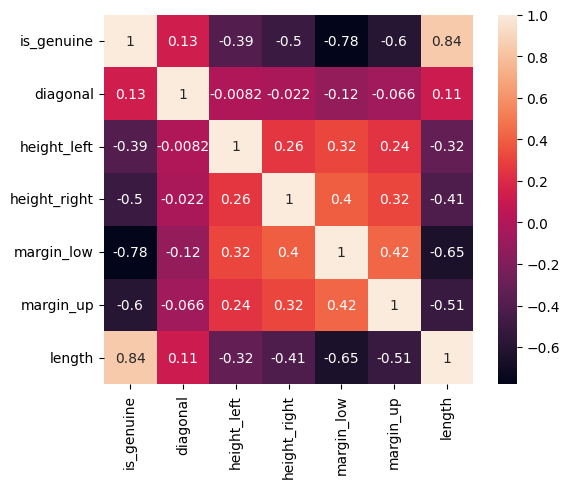

In [49]:
#use a correlation map to view features that interesect and correlate#

corrmat = train.corr()
sns.heatmap(corrmat, annot=True, square=True);

In [53]:
#deciding which inputs/features to use for this model#

X_train = train[['diagonal','margin_low','margin_up','length']]
y_train = train.is_genuine
X_test = test[['diagonal','margin_low','margin_up','length']]
y_test = test.is_genuine

In [54]:
#peek at the training data#

X_train.head()

,diagonal,margin_low,margin_up,length
1353,171.05,4.72,3.10,112.44
673,172.22,3.69,3.17,113.14
39,172.28,3.93,3.08,113.51
1126,172.09,5.53,3.51,112.20
700,172.43,3.99,3.08,112.66


In [55]:
##overall model accuracy is 0.9846##

model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('Accuracy:', metrics.accuracy_score(prediction,y_test))

Accuracy: 0.984641638225256
